<a href="https://colab.research.google.com/github/heeahcodes/pandas-data-analytics-project/blob/main/pandas_data_analytics_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Objective : Evaluate whether tipping behavior differs between smokers and non-smokers, and whether this difference changes by time of day, after normalizing for bill size.

In [12]:
import pandas as pd
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'

df = pd.read_csv(url)
df.head(7) #returns a preview of the dataset, defaulted to 5 rows, here = 7

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [38]:
#normalizing the tip bill

df["tip_pct"] = round(df["tip"]/df["total_bill"]*100,2) #calculates what percentage of the bill is the tip rounded to two decimal places
df.head(10)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68
5,25.29,4.71,Male,No,Sun,Dinner,4,18.62
6,8.77,2.00,Male,No,Sun,Dinner,2,22.81
7,26.88,3.12,Male,No,Sun,Dinner,4,11.61
8,15.04,1.96,Male,No,Sun,Dinner,2,13.03
9,14.78,3.23,Male,No,Sun,Dinner,2,21.85


#### Q1. What is the **average** tip amount in this dataset?

In [39]:
round(df["tip"].mean(),2) #calculating the mean from the specified "tip" column
round(df["tip_pct"].mean(),2) #calculating the mean from the specified "tip_pct" column

np.float64(16.08)

The <u>average</u> tip is $**2.99**.

The <u>average</U> tip percentage is **16.08**%

#### Q2. On average do <u>smokers</u> tip **higher percentage** of the bill than <u>non-smokers</u>?

In [49]:
average_tips = df.groupby("smoker")["tip_pct"].mean() #groupby arranges the tip average grouped by attribute smoker being boleans "yes" or "no"
tip_difference = average_tips["Yes"] - average_tips["No"] #calculates the difference of average tip percentage between yes and no answers for the smoker variable
average_tips
print(f"The tip difference is {round(tip_difference,2)}%")


The tip difference is 0.39%


In [50]:
percentage_diff = tip_difference/average_tips["No"] * 100 #calculates relative difference of two categories
round(percentage_diff,2)

np.float64(2.43)

Based on the calculattions, the dataset reveals that on average <u>smokers</u> tip **0.39% of the bill more** than <u>non-smokers</u>,which corresponds to a roughly **2.4%** higher tip relative to non-smokers.
These numbers suggest that smoking may not be an adequate variable affecting tip amounts.

<Axes: xlabel='smoker'>

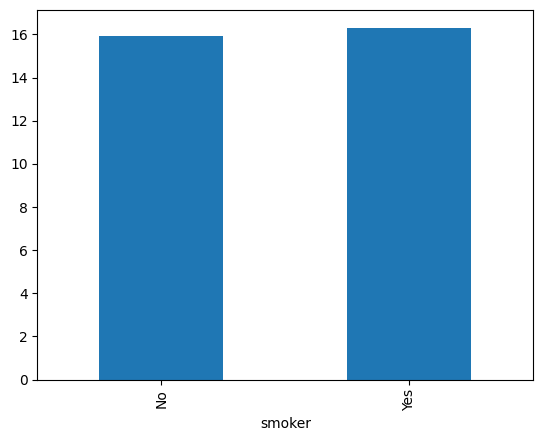

In [43]:
"""The following visualization represents the above information in a bar graph."""
df.groupby("smoker")["tip_pct"].mean().plot(kind = 'bar')

#### Q3. Are the tip amounts influenced by the time of day?

In [56]:
tip_time = df.groupby(["time","smoker"])["tip_pct"].mean().unstack() #arranges tip percentage by the variable 'time' and smoker categories
tip_time

smoker,No,Yes
time,,
Dinner,15.865000,16.082429
Lunch,16.090889,17.039565


In [60]:
tip_time["Time difference"] = tip_time["Yes"] - tip_time["No"]
tip_time

smoker,No,Yes,difference,time difference,Time difference
time,,,,,
Dinner,15.865000,16.082429,0.217429,0.217429,0.217429
Lunch,16.090889,17.039565,0.948676,0.948676,0.948676


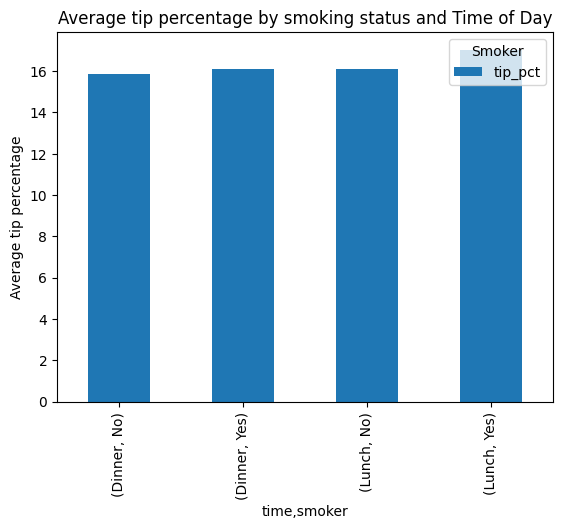

In [67]:
"""The following visualization represents the above information in a bar graph."""
ax = df.groupby(["time", "smoker"])["tip_pct"].mean().plot(kind = 'bar')
ax
ax.set_ylabel("Average tip percentage")
ax.set_title("Average tip percentage by smoking status and Time of Day")
ax.legend(title = "Smoker")

After normalizing for bill size, <u>smokers</u> tip slightly **more** than <u>non-smokers</u> during lunch, but slightly **less** during dinner. The differences being small indicate that the time of day has a greater effect on tipping behavior than smoking status.